In [0]:
import re
import statistics
from collections import Counter
# numpy
import numpy as np
# pandas
import pandas as pd
# ploting
import matplotlib
import matplotlib.pyplot as plt
# sk-learn
import sklearn
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
# stop-words
STOP_WORDS = text.ENGLISH_STOP_WORDS
from wordcloud import WordCloud

In [0]:
!pip3 install wordcloud

In [0]:
df = pd.read_csv("spooky.csv")
print("Total Records:", len(df))

Total Records: 19579


In [0]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64


<BarContainer object of 3 artists>

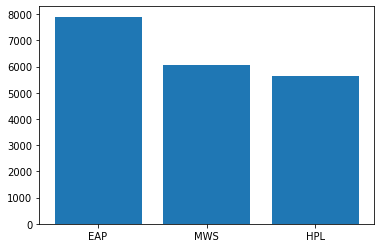

In [0]:
counts = df.author.value_counts()
print(counts)
plt.bar(counts.keys(), counts.values)

In [0]:
len_ls = [len(_t) for _t in df['text']]
df['length'] = len_ls
df.head()

,id,text,author,length
0,id26305,"This process, however, afforded me no means of...",EAP,231
1,id17569,It never once occurred to me that the fumbling...,HPL,71
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,200
3,id27763,How lovely is spring As we looked from Windsor...,MWS,206
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,174


In [0]:
def plot_by_length(count_list):
    w = Counter(count_list)
    plt.bar(w.values(), w.keys())
    plt.xlabel('count')
    plt.ylabel('length')
    plt.show()

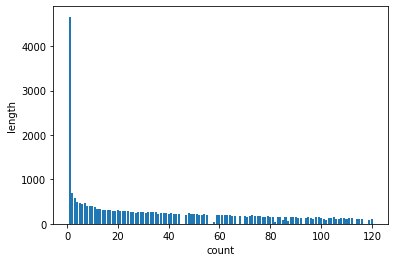

In [0]:
plot_by_length(df['length'].tolist())

### Preprocessing

Convert to lower case, remove punctuation, white spaces, single char, single word

In [0]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

def pre_process(text):
    # lower case converter
    text = text.lower()
    # remove white spaces & non ALPHA_NUM characters
    text = re.sub(r'[^\w\s]','',text).strip()
    ps = PorterStemmer() 
    v = [ps.stem(w) for w in text.split()] 

    text = " ".join(v)
    
    return text

def tokenizer(text):
    words = text.split()
    out_words = []
    for w in words:
        w = w.strip()
        # word length must > 1
        # word not stop word
        # word not digits
        if len(w) > 1 and w not in STOP_WORDS and not w.isdigit():
            out_words.append(w)
    return out_words 


In [0]:
sample_text = df.text[0]

In [0]:
sample_text

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [0]:
tokenizer(pre_process(sample_text))

['thi',
 'process',
 'howev',
 'afford',
 'mean',
 'ascertain',
 'dimens',
 'dungeon',
 'make',
 'circuit',
 'return',
 'point',
 'whenc',
 'set',
 'awar',
 'fact',
 'perfectli',
 'uniform',
 'wall']

---------------------------------
Author: EAP


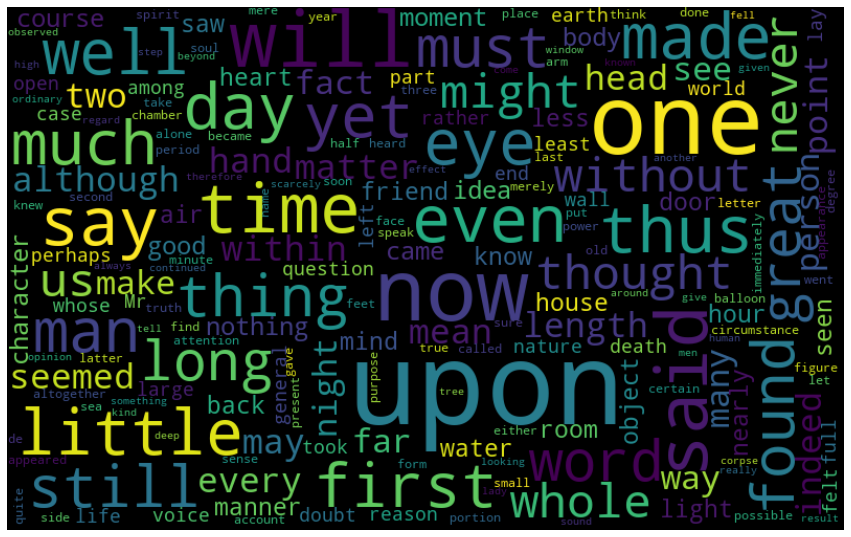

---------------------------------
Author: HPL


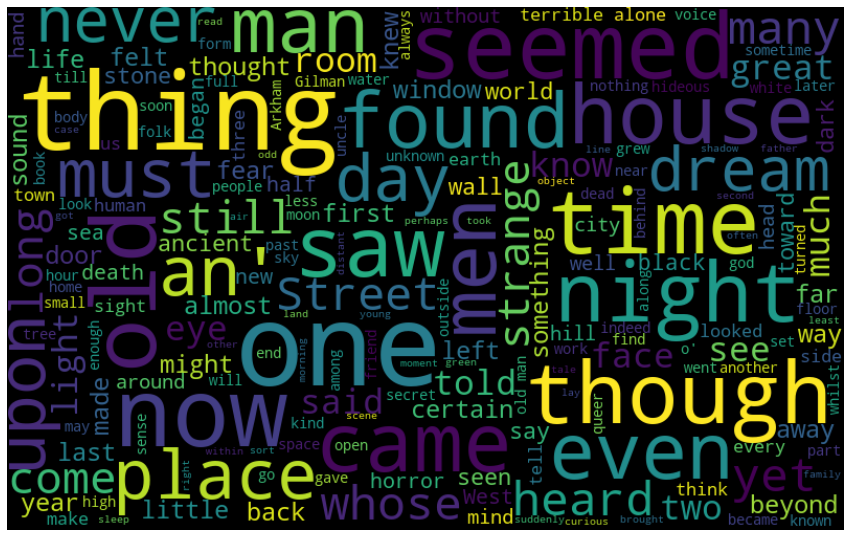

---------------------------------
Author: MWS


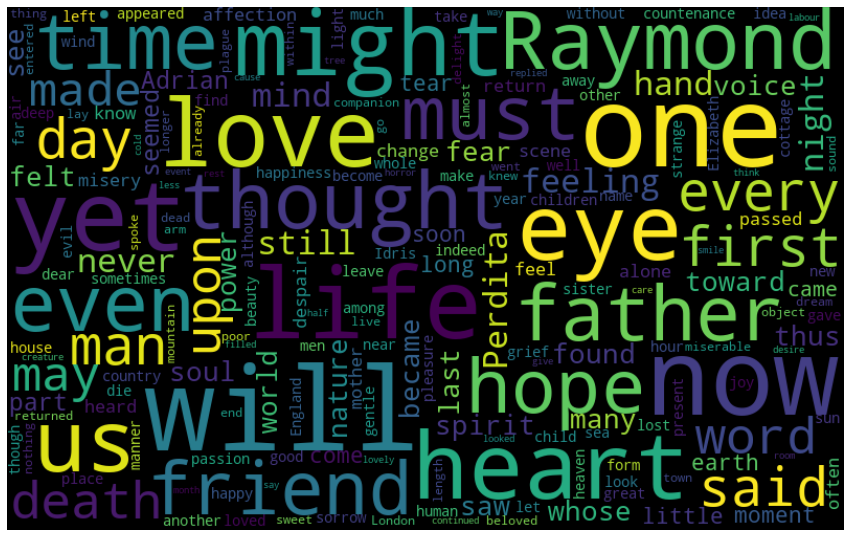

In [0]:
for author_name in ['EAP', 'HPL', 'MWS']:
    print('---------------------------------')
    print('Author:', author_name)
    data = df[df['author'] == author_name]
    text = ' '.join([text for text in data['text']])

    wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(15, 12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()                  


### test_train split

In [0]:
df["text"].apply(pre_process).to_frame()

,text
0,thi process howev afford me no mean of ascerta...
1,it never onc occur to me that the fumbl might ...
2,in hi left hand wa a gold snuff box from which...
3,how love is spring as we look from windsor ter...
4,find noth els not even gold the superintend ab...
...,...
19574,i could have fanci while i look at it that som...
19575,the lid clench themselv togeth as if in a spasm
19576,mai il faut agir that is to say a frenchman ne...
19577,for an item of news like thi it strike us it w...


In [0]:
X = df["text"].apply(pre_process).values
y = df[["author"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [0]:
train_count = np.unique(y_train, return_counts=True)
test_count = np.unique(y_test, return_counts=True)

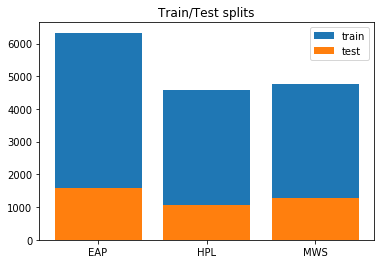

In [0]:
plt.bar(train_count[0], train_count[1])
plt.bar(test_count[0], test_count[1])
plt.legend(['train','test'])
plt.title('Train/Test splits')
plt.show()

### Feature encoding

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(preprocessor=pre_process, tokenizer=tokenizer,max_features=10000)
lbl_encoder = LabelEncoder()
X_train_vect = count_vectorizer.fit_transform(X_train)
X_test_vect = count_vectorizer.transform(X_test)
y_train_vect = lbl_encoder.fit_transform(y_train)
y_test_vect = lbl_encoder.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
model = MultinomialNB()
model.fit(X_train_vect, y_train)

print('Training Accuracy:', model.score(X_train_vect, y_train))

Training Accuracy: 0.8789503926450871


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Deep learning

In [0]:
X = df["text"].apply(pre_process).values
y = pd.get_dummies(df[["author"]]).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [0]:
y_train

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

### Preprocessing

#### To integers

In [0]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_deep = tokenizer.texts_to_sequences(X_train)
X_test_deep = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

Using TensorFlow backend.


In [0]:
print(X_train_deep[0])
print(X_train[2])

[12, 89, 29, 1494, 2, 53, 474, 7, 27, 627]
onc idri name me casual a frown a convuls gestur of anger shook her mother and with voic trembl with hate she said i am of littl worth in thi world the young are impati to push the old off the scene but idri if you do not wish to see your mother expir at your feet never again name that person to me all els i can bear and now i am resign to the destruct of my cherish hope but it is too much to requir that i should love the instrument that provid gift with murder properti for my destruct


#### Pad sequence

In [0]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 50

X_train_deep = pad_sequences(X_train_deep, padding='post', maxlen=maxlen)
X_test_deep = pad_sequences(X_test_deep, padding='post', maxlen=maxlen)

In [0]:
X_train_deep[0]

array([  12,   89,   29, 1494,    2,   53,  474,    7,   27,  627,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

#### Plot method

In [0]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

#### Model

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM, Flatten, BatchNormalization, CuDNNLSTM, SimpleRNN
from keras import regularizers

In [0]:
embedding_dim = 50

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=50))
model.add(CuDNNLSTM(10))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
             
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 50)            729450    
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 10)                2480      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 731,963
Trainable params: 731,963
Non-trainable params: 0
_________________________________________________________________


Train on 15663 samples, validate on 15663 samples
Epoch 1/10
15663/15663 [==============================] - 1s 74us/step - loss: 0.6315 - acc: 0.6667 - val_loss: 0.6292 - val_acc: 0.6667
Epoch 2/10
15663/15663 [==============================] - 1s 36us/step - loss: 0.6042 - acc: 0.6839 - val_loss: 0.5251 - val_acc: 0.7495
Epoch 3/10
15663/15663 [==============================] - 1s 36us/step - loss: 0.4875 - acc: 0.7646 - val_loss: 0.4208 - val_acc: 0.8001
Epoch 4/10
15663/15663 [==============================] - 1s 35us/step - loss: 0.4159 - acc: 0.8034 - val_loss: 0.3502 - val_acc: 0.8539
Epoch 5/10
15663/15663 [==============================] - 1s 39us/step - loss: 0.3512 - acc: 0.8558 - val_loss: 0.2846 - val_acc: 0.8998
Epoch 6/10
15663/15663 [==============================] - 1s 38us/step - loss: 0.2979 - acc: 0.8943 - val_loss: 0.2325 - val_acc: 0.9260
Epoch 7/10
15663/15663 [==============================] - 1s 39us/step - loss: 0.2424 - acc: 0.9227 - val_loss: 0.1923 - val_acc

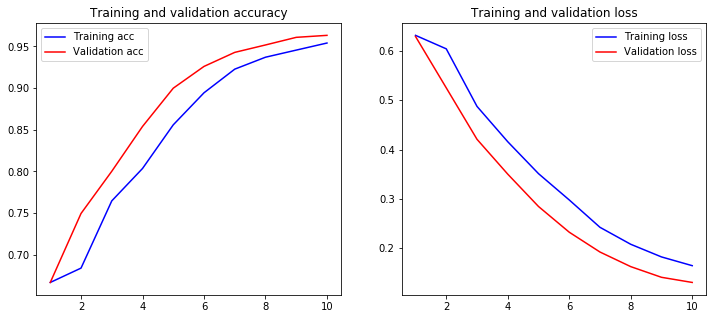

In [0]:
history = model.fit(X_train_deep, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_train_deep, y_train),
                    batch_size=256)

loss, accuracy = model.evaluate(X_train_deep, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_deep, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)